In [1]:
import glob

import matplotlib.pyplot as plt
import numpy as np
from pidng.core import RPICAM2DNG

In [2]:
d = RPICAM2DNG()

In [3]:
directory = "lamptest_new_250"
filepaths = glob.glob(f"{directory}/frame-*.jpg")
filepaths


['lamptest_new_250/frame-00000.jpg',
 'lamptest_new_250/frame-00001.jpg',
 'lamptest_new_250/frame-00003.jpg',
 'lamptest_new_250/frame-00002.jpg',
 'lamptest_new_250/frame-00006.jpg',
 'lamptest_new_250/frame-00007.jpg',
 'lamptest_new_250/frame-00005.jpg',
 'lamptest_new_250/frame-00004.jpg',
 'lamptest_new_250/frame-00009.jpg',
 'lamptest_new_250/frame-00008.jpg']

In [4]:
flatfieldpath = filepaths[0]
flatfieldpath

'lamptest_new_250/frame-00000.jpg'

In [5]:
flatfield = None

def processing(raw, _dummy):
    global flatfield
    flatfield = raw
    return raw

RPICAM2DNG().convert(flatfieldpath, process=processing)

'lamptest_new_250/frame-00000.dng'

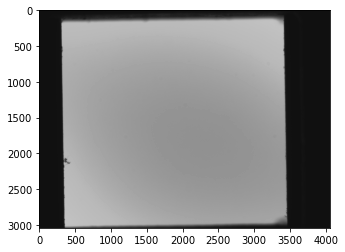

In [6]:
plt.imshow(flatfield, cmap="gray", vmin=0, vmax=4095)
plt.show()

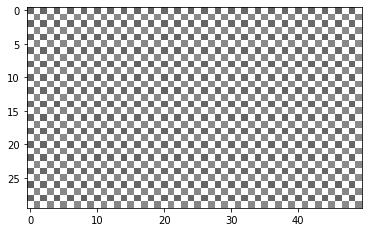

In [7]:
plt.imshow(flatfield[400:430,3000:3050], cmap="gray", interpolation="None", vmin=0, vmax=4095)
plt.show()

In [8]:
flatfield.min()

247

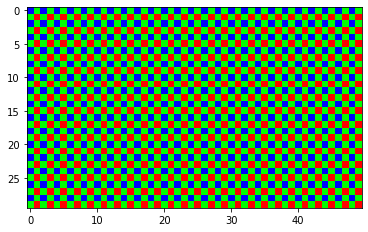

In [9]:
bayer_test = np.zeros((flatfield.shape[0],flatfield.shape[1],3), dtype="uint8")
bayer_test[::2,::2] = [0, 0, 255]
bayer_test[1::2,1::2] = [255, 0, 0]
bayer_test[1::2,::2] = [0, 255, 0]
bayer_test[::2,1::2] = [0, 255, 0]

plt.imshow(bayer_test[400:430,3000:3050], interpolation="none")
plt.show()

In [14]:
redmask = np.full_like(flatfield, False, dtype="bool")
redmask[1::2,1::2] = True

greenmask = np.full_like(flatfield, False, dtype="bool")
greenmask[1::2,::2] = True
greenmask[::2,1::2] = True

bluemask = np.full_like(flatfield, False, dtype="bool")
bluemask[::2,::2] = True

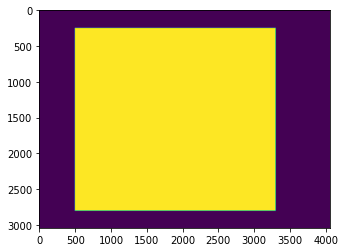

In [18]:
roimask = np.full_like(flatfield, False, dtype="bool")
roimask[250:2800,500:3300] = True

plt.imshow(roimask)
plt.show()

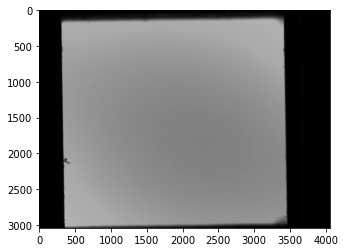

In [19]:
minusblack = flatfield.astype("float") - 256

plt.imshow(minusblack, cmap="gray", vmin=0, vmax=4095)
plt.show()

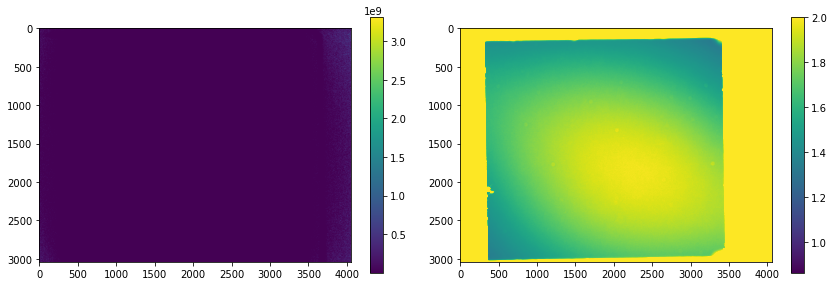

In [24]:
redroimask = roimask & redmask
redgain = minusblack[redroimask].mean() / minusblack.clip(1e-6, None)
greenroimask = roimask & greenmask
greengain = minusblack[greenroimask].mean() / minusblack.clip(1e-6, None)
blueroimask = roimask & bluemask
bluegain = minusblack[blueroimask].mean() / minusblack.clip(1e-6, None)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(greengain)
plt.colorbar()
plt.subplot(122)
plt.imshow(greengain, vmax=2)
plt.colorbar()
plt.tight_layout()
plt.show()

In [26]:
flatfield.dtype, redgain.dtype

(dtype('uint16'), dtype('float64'))

In [27]:
def ffc(raw, _dummy):
    print("Running flat-field correction")
    minusblack = raw.astype("float") - 256

    corrected = np.zeros_like(minusblack)
    corrected[redmask] = minusblack[redmask] * redgain[redmask]
    corrected[greenmask] = minusblack[greenmask] * greengain[greenmask]
    corrected[bluemask] = minusblack[bluemask] * bluegain[bluemask]
    
    plusblack = (corrected + 256).clip(0, 4095).astype("uint16")
    
    return plusblack

In [28]:
for filepath in filepaths:
    print(f"Converting {filepath}")
    RPICAM2DNG().convert(filepath, process=ffc)

Converting lamptest_new_250/frame-00000.jpg
Running flat-field correction
Converting lamptest_new_250/frame-00001.jpg
Running flat-field correction
Converting lamptest_new_250/frame-00003.jpg
Running flat-field correction
Converting lamptest_new_250/frame-00002.jpg
Running flat-field correction
Converting lamptest_new_250/frame-00006.jpg
Running flat-field correction
Converting lamptest_new_250/frame-00007.jpg
Running flat-field correction
Converting lamptest_new_250/frame-00005.jpg
Running flat-field correction
Converting lamptest_new_250/frame-00004.jpg
Running flat-field correction
Converting lamptest_new_250/frame-00009.jpg
Running flat-field correction
Converting lamptest_new_250/frame-00008.jpg
Running flat-field correction


In [29]:
directory = "lamptest_new_copy"
otherfilepaths = glob.glob(f"{directory}/frame-*.jpg")
otherfilepaths

['lamptest_new_copy/frame-00000.jpg',
 'lamptest_new_copy/frame-00001.jpg',
 'lamptest_new_copy/frame-00003.jpg',
 'lamptest_new_copy/frame-00002.jpg',
 'lamptest_new_copy/frame-00006.jpg',
 'lamptest_new_copy/frame-00007.jpg',
 'lamptest_new_copy/frame-00005.jpg',
 'lamptest_new_copy/frame-00004.jpg',
 'lamptest_new_copy/frame-00009.jpg',
 'lamptest_new_copy/frame-00008.jpg']

In [30]:
for filepath in otherfilepaths:
    print(f"Converting {filepath}")
    RPICAM2DNG().convert(filepath, process=ffc)

Converting lamptest_new_copy/frame-00000.jpg
Running flat-field correction
Converting lamptest_new_copy/frame-00001.jpg
Running flat-field correction
Converting lamptest_new_copy/frame-00003.jpg
Running flat-field correction
Converting lamptest_new_copy/frame-00002.jpg
Running flat-field correction
Converting lamptest_new_copy/frame-00006.jpg
Running flat-field correction
Converting lamptest_new_copy/frame-00007.jpg
Running flat-field correction
Converting lamptest_new_copy/frame-00005.jpg
Running flat-field correction
Converting lamptest_new_copy/frame-00004.jpg
Running flat-field correction
Converting lamptest_new_copy/frame-00009.jpg
Running flat-field correction
Converting lamptest_new_copy/frame-00008.jpg
Running flat-field correction
